In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

Reading Data from File

In [101]:
df= pd.read_csv(r"C:\Users\Dell\Desktop\environmental_data.csv")

In [102]:
df.head()

,Location_ID,Timestamp,Temperature (°C),Humidity (%),Noise Level (dB),Emotion Label
0,1,2024-01-01 00:00:00,28.4,47,41,Sad
1,2,2024-01-01 00:01:00,28.3,66,53,Happy
2,3,2024-01-01 00:02:00,24.4,69,32,Angry
3,4,2024-01-01 00:03:00,24.3,58,46,Angry
4,5,2024-01-01 00:04:00,27.4,56,81,Sad


In [103]:
df.drop(columns=['Timestamp','Emotion Label'],inplace=True)

In [104]:
df.head()

,Location_ID,Temperature (°C),Humidity (%),Noise Level (dB)
0,1,28.4,47,41
1,2,28.3,66,53
2,3,24.4,69,32
3,4,24.3,58,46
4,5,27.4,56,81


In [105]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location_ID       1000 non-null   int64  
 1   Temperature (°C)  1000 non-null   float64
 2   Humidity (%)      1000 non-null   int64  
 3   Noise Level (dB)  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


Location_ID         0
Temperature (°C)    0
Humidity (%)        0
Noise Level (dB)    0
dtype: int64

In [106]:
df.describe()

,Location_ID,Temperature (°C),Humidity (%),Noise Level (dB)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,24.245100,53.798000,58.650000
std,288.819436,3.494107,14.171875,17.472916
min,1.000000,18.000000,30.000000,30.000000
25%,250.750000,21.200000,42.000000,43.000000
50%,500.500000,24.400000,53.000000,58.000000
75%,750.250000,27.300000,66.000000,75.000000
max,1000.000000,30.000000,79.000000,89.000000


In [107]:
df.corr()

,Location_ID,Temperature (°C),Humidity (%),Noise Level (dB)
Location_ID,1.000000,0.031165,0.031460,0.033482
Temperature (°C),0.031165,1.000000,0.025621,-0.004873
Humidity (%),0.031460,0.025621,1.000000,-0.001757
Noise Level (dB),0.033482,-0.004873,-0.001757,1.000000


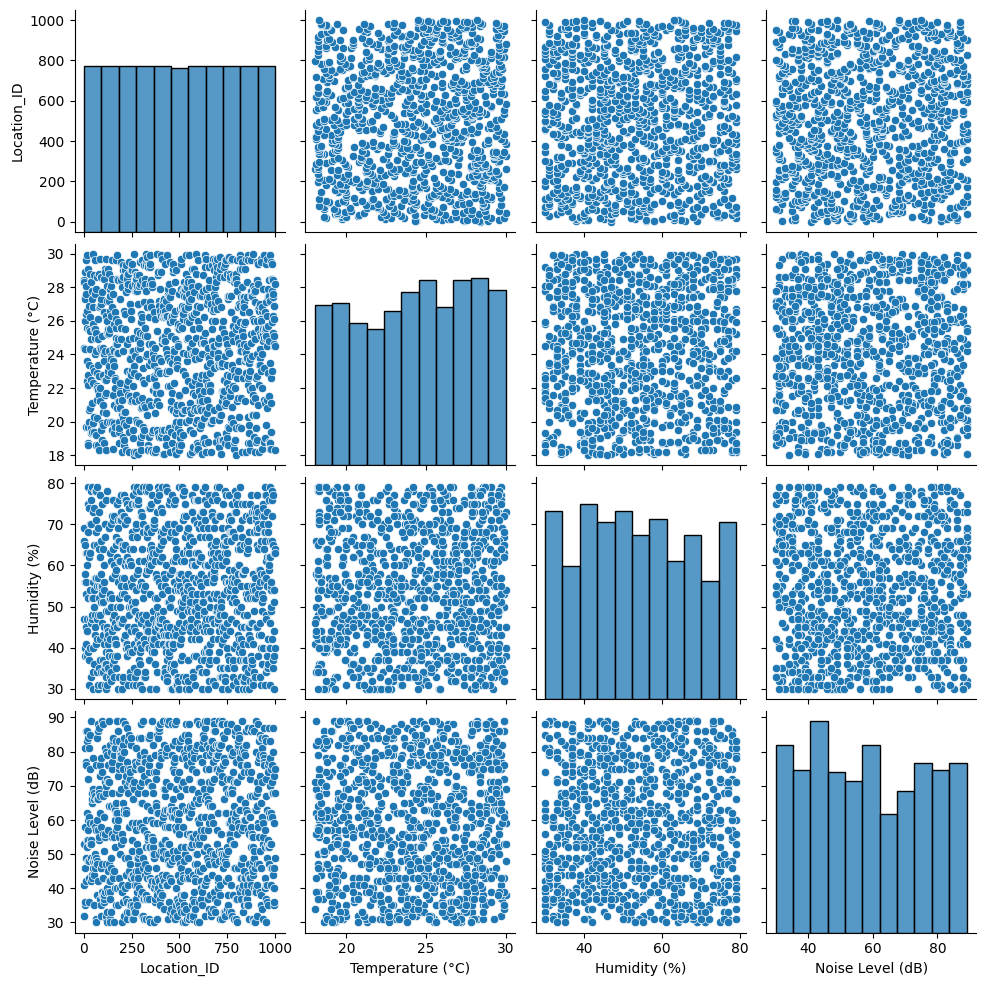

In [108]:
sns.pairplot(df)
plt.show()

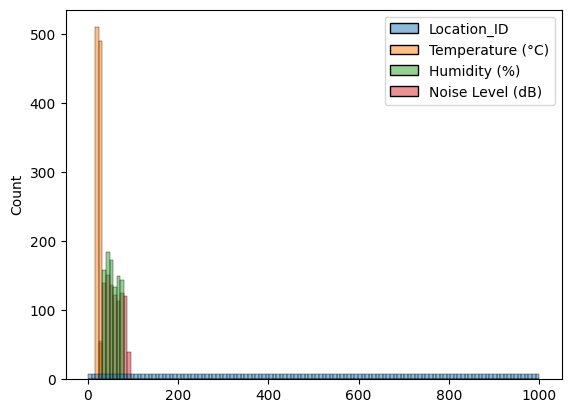

In [124]:
sns.histplot(df)
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()

In [127]:
normalised_data=scaler.fit_transform(df)

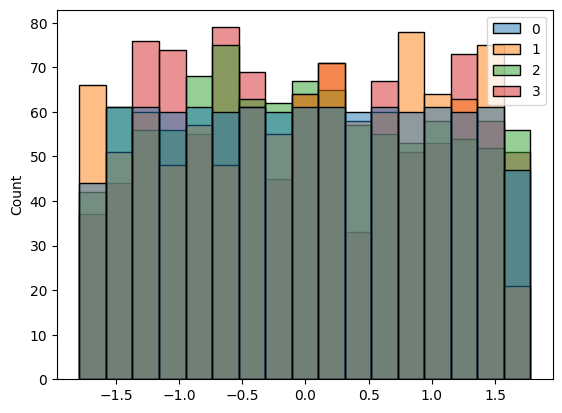

In [129]:
sns.histplot(normalised_data)
plt.show()

In [128]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [131]:
x=normalised_data[:,[1,2]]
y=normalised_data[:,[2]]

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [133]:
model=linear_model.LinearRegression()

In [134]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
y_predict=model.predict(x_test)

In [136]:
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
print("Mean Squared Error = ",mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error = ",np.sqrt(mean_squared_error(y_test,y_predict)))

Mean Squared Error =  6.4008653847547995e-31
Root Mean Squared Error =  8.000540847189519e-16


In [138]:
print('R2 Score: ',r2_score(y_test,y_predict))

R2 Score:  1.0


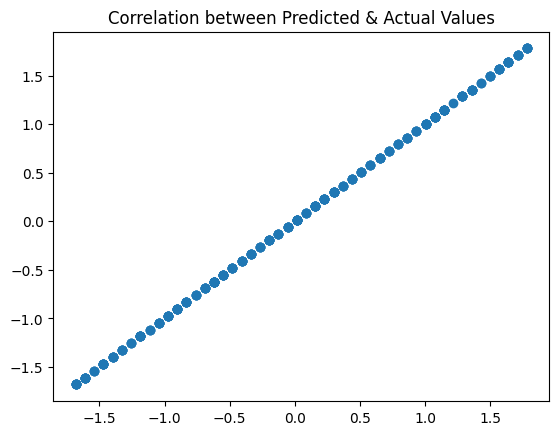

In [143]:
plt.scatter(y_test,y_predict)
plt.title('Correlation between Predicted & Actual Values')
plt.show()